In [1]:
#Collect and Explore Data

import pandas as pd
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:

import pandas as pd
data = pd.read_csv('titanic.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Drop unnecessary columns (e.g., 'PassengerId', 'Name', 'Ticket', 'Cabin')
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data = data.drop(columns_to_drop, axis=1)

# Display the first few rows of the modified dataset
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
# Handle categorical variables ('Embarked' and 'Sex')
data = pd.get_dummies(data, columns=['Embarked', 'Sex'], drop_first=True)

# Check the modified dataset with dummy variables
print(data.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  \
0         0       3  22.0      1      0   7.2500           0           1   
1         1       1  38.0      1      0  71.2833           0           0   
2         1       3  26.0      0      0   7.9250           0           1   
3         1       1  35.0      1      0  53.1000           0           1   
4         0       3  35.0      0      0   8.0500           0           1   

   Sex_male  
0         1  
1         0  
2         0  
3         0  
4         1  


In [6]:
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
titanic_data = pd.read_csv('titanic.csv')

# Separate the target variable ('Survived') from the features
X = titanic_data.drop('Survived', axis=1)  # Features
y = titanic_data['Survived']  # Target variable

# Remove non-numeric columns (e.g., 'Name', 'Ticket', 'Cabin')
X_numeric = X.select_dtypes(include=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Perform feature scaling on the numeric features (X_numeric)
X_scaled = pd.DataFrame(scaler.fit_transform(X_numeric), columns=X_numeric.columns)

# Display the first 5 rows of the scaled dataset
X_scaled.head(5)
 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-1.730108,0.827377,-0.530377,0.432793,-0.473674,-0.502445
1,-1.726220,-1.566107,0.571831,0.432793,-0.473674,0.786845
2,-1.722332,0.827377,-0.254825,-0.474545,-0.473674,-0.488854
3,-1.718444,-1.566107,0.365167,0.432793,-0.473674,0.420730
4,-1.714556,0.827377,0.365167,-0.474545,-0.473674,-0.486337


In [7]:
from sklearn.model_selection import train_test_split

# Separate the target variable ('Survived') from the features
X = titanic_data.drop('Survived', axis=1)  # Features
y = titanic_data['Survived']  # Target variable

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (712, 11)
X_test shape: (179, 11)
y_train shape: (712,)
y_test shape: (179,)


In [8]:
#Train and Evaluate Models:
#Import classifiers and train models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['number']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['number']))

# Create an imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_scaled = imputer.fit_transform(X_train_scaled)

# Transform the test data using the same imputer
X_test_scaled = imputer.transform(X_test_scaled)

# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for model_name, model in models.items():
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)
    print("=" * 40)


Model: Logistic Regression
Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       105
           1       0.77      0.50      0.61        74

    accuracy                           0.73       179
   macro avg       0.74      0.70      0.70       179
weighted avg       0.74      0.73      0.72       179

Confusion Matrix:
 [[94 11]
 [37 37]]
Model: Random Forest
Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       105
           1       0.70      0.59      0.64        74

    accuracy                           0.73       179
   macro avg       0.72      0.71      0.71       179
weighted avg       0.72      0.73      0.72       179

Confusion Matrix:
 [[86 19]
 [30 44]]
Model: Support Vector Machine
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0

In [9]:
#Model Tuning:
#Hyperparameter tuning using GridSearchCV 

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with RandomForestClassifier
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Get the best model and its score
best_model = grid.best_estimator_
best_score = grid.best_score_

print(f"Best model: {best_model}")
print(f"Best score: {best_score:.2f}")

Best model: RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)
Best score: 0.72


In [10]:
#feature_selection using RFECV

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.impute import SimpleImputer

# Load the Titanic dataset
titanic_data = pd.read_csv('titanic.csv')

# Separate the target variable ('Survived') from the features
X = titanic_data.drop(['Survived', 'Name'], axis=1)  # Remove 'Name' column
y = titanic_data['Survived']  # Target variable

# Remove non-numeric columns (e.g., 'Ticket', 'Cabin')
X_numeric = X.select_dtypes(include=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Perform feature scaling on the numeric features (X_numeric)
X_scaled = pd.DataFrame(scaler.fit_transform(X_numeric), columns=X_numeric.columns)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Instantiate the best model (e.g., RandomForestClassifier with tuned hyperparameters)
best_model = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=10)

# Create the RFECV object and fit it to the training data
selector = RFECV(best_model, step=1, cv=5, scoring='accuracy')
selector.fit(X_train, y_train)

# Get the selected features and their ranks
selected_features = X_numeric.columns[selector.support_]
feature_ranks = selector.ranking_

print(f"Selected features: {selected_features}")
print(f"Feature ranks: {feature_ranks}")


Selected features: Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')
Feature ranks: [1 1 1 1 2 1]


In [11]:
# Convert selected_features to a list
selected_features_list = selected_features.tolist()

# Remove target variable from the list of selected features if it's present
if 'Survived' in selected_features_list:
    selected_features_list.remove('Survived')

# Ensure that X_train and X_test have the same columns
X_train = X_train[:, selector.support_]
X_test = X_test[:, selector.support_]

In [12]:
# Train the best model on the list of selected features
best_model = best_model.fit(X_train, y_train)

# Make predictions on the test set using the trained model
y_pred = best_model.predict(X_test)

# Evaluate the model using accuracy_score
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with selected features: {test_accuracy}")

Test accuracy with selected features: 0.7430167597765364


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print evaluation scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.7430
Precision: 0.7692
Recall: 0.5405
F1-score: 0.6349
AUC-ROC: 0.7131


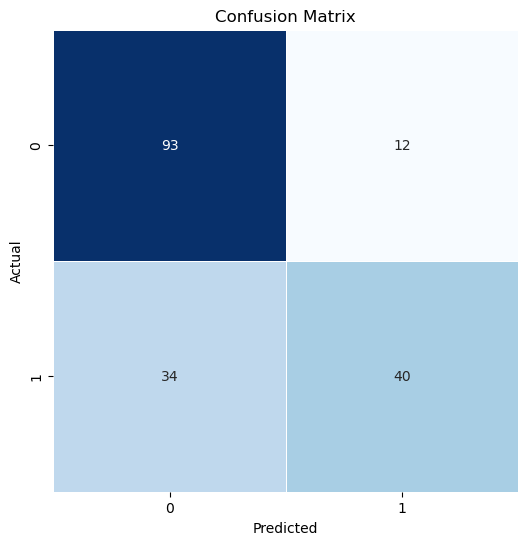

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Save the confusion matrix as an image
plt.savefig('confusion_matrix.png')

# Show the plot
plt.show()

In [15]:
import json

# Convert selected_features_list to JSON and save it
with open("selected_features.json", "w") as f:
    json.dump(selected_features_list, f)

In [16]:
import joblib

# Save the best model to a file
joblib.dump(best_model, "best_model1.pkl")

['best_model1.pkl']

In [17]:
import pickle

with open("best_model1.pkl", "wb") as file:
    pickle.dump(best_model, file)
